   price  size  bedrooms
0    245  1400         3
1    312  1600         4
2    279  1700         3
3    308  1875         4
4    199  1100         2
5    219  1300         3
6    405  2100         5
7    324  1800         4
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     48.70
Date:                Tue, 28 Oct 2025   Prob (F-statistic):           0.000527
Time:                        21:56:41   Log-Likelihood:                -32.265
No. Observations:                   8   AIC:                             70.53
Df Residuals:                       5   BIC:                             70.77
Df Model:                           2                                         
Covariance Type:            nonrobust                           

C:\Users\default.DESKTOP-GGCF6CQ\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=8 observations were given.
  return hypotest_fun_in(*args, **kwds)


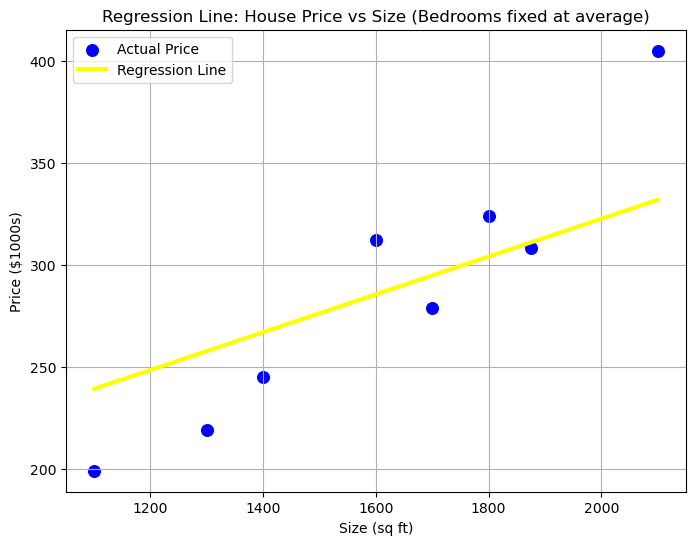

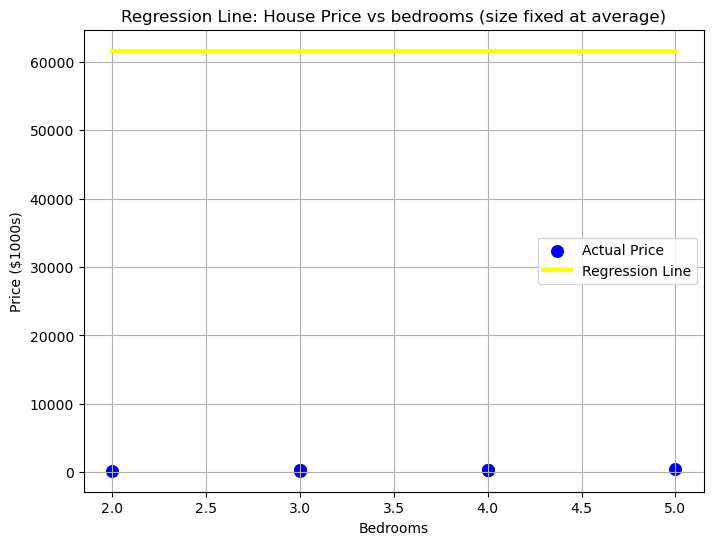

In [2]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np

data = {
    "price": [245, 312, 279, 308, 199, 219, 405, 324],
    "size": [1400, 1600, 1700, 1875, 1100, 1300, 2100, 1800],
    "bedrooms": [3, 4, 3, 4, 2, 3, 5, 4]
}
df = pd.DataFrame(data)
print(df)

Y=df["price"]
X=df[["size", "bedrooms"]]
X=sm.add_constant(X)

model = sm.OLS(Y, X).fit()
print(model.summary())

df["predicted_price"] = model.predict(X)

# Create a range of size values
size_range = np.linspace(df["size"].min(), df["size"].max(), 100)

# Keep bedrooms constant at its average value
mean_bedrooms = df["bedrooms"].mean()

# Compute predicted prices using the regression coefficients
# model = fitted OLS model
X_line = pd.DataFrame({
    "const": 1,
    "size": size_range,
    "bedrooms": [mean_bedrooms] * 100
})

# Predict prices
y_line = model.predict(X_line)

# Plot everything
plt.figure(figsize=(8, 6))
plt.scatter(df["size"], df["price"], color='blue', label='Actual Price', s=70)
plt.plot(size_range, y_line, color='yellow', label='Regression Line', linewidth=3)

plt.title("Regression Line: House Price vs Size (Bedrooms fixed at average)")
plt.xlabel("Size (sq ft)")
plt.ylabel("Price ($1000s)")
plt.legend()
plt.grid(True)
plt.show()

# Create a range of size values
bedrooms_range = np.linspace(df["bedrooms"].min(), df["bedrooms"].max(), 100)

# Keep bedrooms constant at its average value
mean_size = df["size"].mean()

# Compute predicted prices using the regression coefficients
# model = fitted OLS model
X_line = pd.DataFrame({
    "const": 1,
    "bedrooms": bedrooms_range,
    "size": [mean_size] * 100
})

# Predict prices
y_line = model.predict(X_line)

# Plot everything
plt.figure(figsize=(8, 6))
plt.scatter(df["bedrooms"], df["price"], color='blue', label='Actual Price', s=70)
plt.plot(bedrooms_range, y_line, color='yellow', label='Regression Line', linewidth=3)

plt.title("Regression Line: House Price vs bedrooms (size fixed at average)")
plt.xlabel("Bedrooms")
plt.ylabel("Price ($1000s)")
plt.legend()
plt.grid(True)
plt.show()